In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#1. What are the features used in this dataset for customer segmentation?
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
data.drop('CustomerID', axis=1, inplace=True) #drop 'CustomerID' attribute as it is not needed for analysis

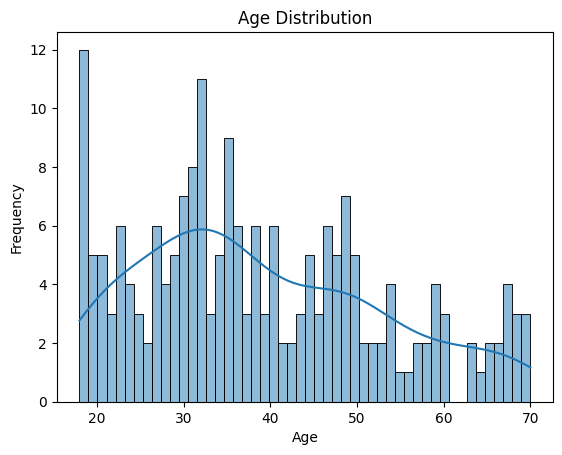

In [5]:
#2. What is the distribution of the 'Age' feature in the dataset?
sns.histplot(data['Age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [6]:
#The distribution of the 'Age' feature in the dataset is positively skewed

In [7]:
#3. Which feature has the highest correlation with the 'Spending Score (1-100)' feature?
corr_matrix = data.corr()
corr_matrix

<ipython-input-7-52cb29b57cec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [8]:
#feature 'Annual Income (k$)' has the highest correlation with the 'Spending Score (1-100)' feature

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [10]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
for i in range(len(data)):
    if data['Gender'][i] == 'Female':
        data['Gender'][i] = 0
    else:
        data['Gender'][i] = 1

data['Gender'].value_counts()

<ipython-input-11-7e73c5592f66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'][i] = 1
<ipython-input-11-7e73c5592f66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'][i] = 0


0    112
1     88
Name: Gender, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[]

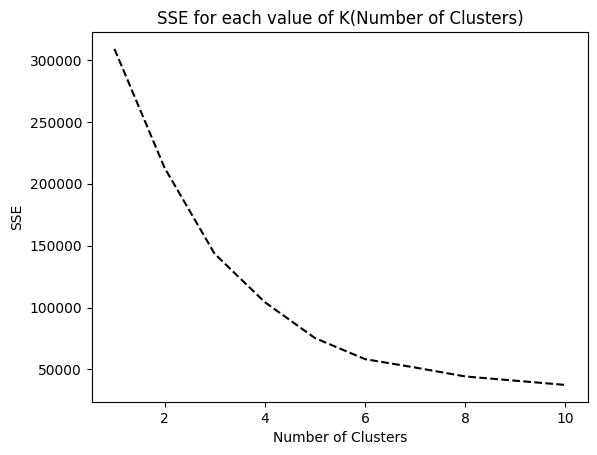

In [12]:
#4. What is the optimal number of clusters for customer segmentation according to the Elbow Method?
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE, 'k--')
plt.title('SSE for each value of K(Number of Clusters)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot()

In [13]:
#Optimal number of clusters according to the Elbow Method is 3

In [14]:
#5. What is the average annual income of customers in the dataset?
print('Average annual income of customers:', data['Annual Income (k$)'].mean())

Average annual income of customers: 60.56


In [15]:
#6. What is the average spending score of male customers in the dataset?
print('Average spending score of male customers:', data[data['Gender'] == 1]['Spending Score (1-100)'].mean())

Average spending score of male customers: 48.51136363636363


In [16]:
#7. Which cluster has the highest average income and spending score?
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

data['Cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    123
2     39
0     38
Name: Cluster, dtype: int64

In [17]:
for cluster in range(0, 3):
    avg_income = data[data['Cluster'] == cluster]['Annual Income (k$)'].mean()
    avg_spending_score = data[data['Cluster'] == cluster]['Spending Score (1-100)'].mean()

    print(f'Average income of customers belonging to cluster {cluster}:', avg_income)
    print(f'Average spending score of customers belonging to cluster {cluster}:', avg_spending_score)
    print('\n')

Average income of customers belonging to cluster 0: 87.0
Average spending score of customers belonging to cluster 0: 18.63157894736842


Average income of customers belonging to cluster 1: 44.15447154471545
Average spending score of customers belonging to cluster 1: 49.829268292682926


Average income of customers belonging to cluster 2: 86.53846153846153
Average spending score of customers belonging to cluster 2: 82.12820512820512




In [18]:
#Cluster 0 has the highest average income and Cluster 2 has the highest spending score

In [19]:
#8. What is the percentage of customers in Cluster 1?
print('Percentage of customers in Cluster 1:', (data['Cluster'].value_counts(normalize=True)*100)[1])

Percentage of customers in Cluster 1: 61.5


In [20]:
#9. What is the most frequent age group in Cluster 2?
print('Most frequent age group in Cluster 2:', data[data['Cluster'] == 2]['Age'].mode()[0])

Most frequent age group in Cluster 2: 32


In [21]:
#10. What is the average income of customers in Cluster 3(0)?
print('Average income of customers in Cluster 3:', data[data['Cluster'] == 0]['Annual Income (k$)'].mean())

Average income of customers in Cluster 3: 87.0


In [22]:
#11. Show the count of value in each cluster.
data['Cluster'].value_counts()

1    123
2     39
0     38
Name: Cluster, dtype: int64

In [23]:
#12. Show customers from each cluster.
for cluster in range(0, 3):
    print(f'Some customers belonging to cluster {cluster}:')
    print(data[data['Cluster'] == cluster].head(5))
    print('\n')

Some customers belonging to cluster 0:
    Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
124      0   23                  70                      29        0
126      1   43                  71                      35        0
128      1   59                  71                      11        0
130      1   47                  71                       9        0
132      0   25                  72                      34        0


Some customers belonging to cluster 1:
  Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0      1   19                  15                      39        1
1      1   21                  15                      81        1
2      0   20                  16                       6        1
3      0   23                  16                      77        1
4      0   31                  17                      40        1


Some customers belonging to cluster 2:
    Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cl

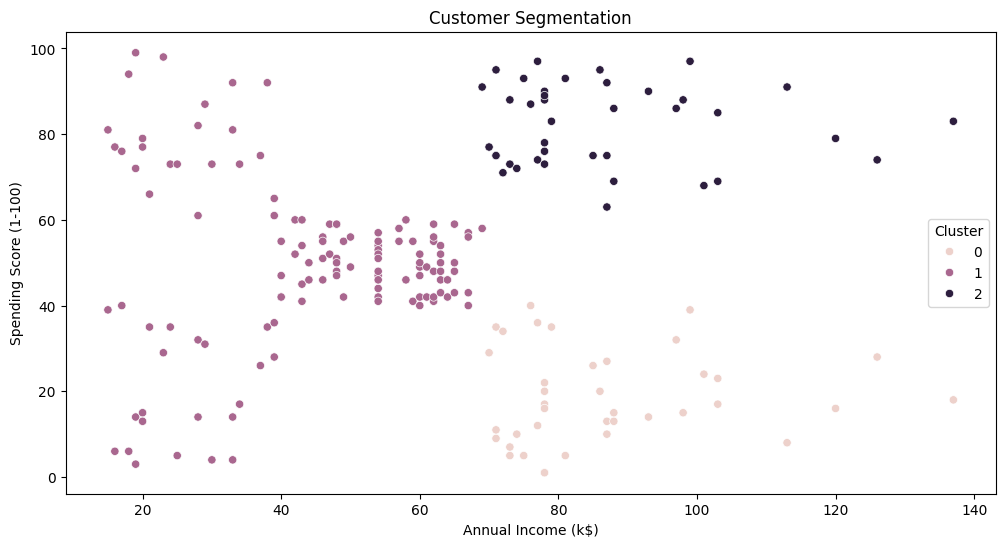

In [24]:
#13. Make a visualization of the clusters.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()